In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

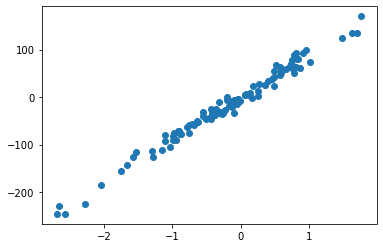

In [3]:

x, y = make_regression(n_samples=100, n_features=1, noise = 10) # creation d'un dataset (x, y) linéaire
plt.scatter(x, y) # afficher les résultats. x en abscisse et y en ordonnée

In [4]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [5]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones(x.shape)))

print(X.shape)
print(X[:10])

(100, 2)
[[ 0.75845018  1.        ]
 [ 0.72619324  1.        ]
 [-1.29826992  1.        ]
 [ 0.40220114  1.        ]
 [-0.30461175  1.        ]
 [ 0.24947797  1.        ]
 [-2.66124729  1.        ]
 [ 0.48031075  1.        ]
 [-0.22881254  1.        ]
 [ 0.47820978  1.        ]]


In [6]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(2, 1)
theta

array([[0.24406715],
       [0.72955489]])

In [7]:
def model(X, theta):
    return X.dot(theta)

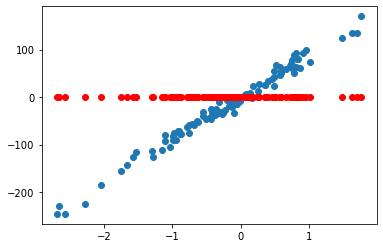

In [8]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

In [9]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [10]:
cost_function(X, y, theta)

3465.412763099097

In [11]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [12]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [13]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [14]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[8.85535605e+01],
       [7.61222893e-02]])

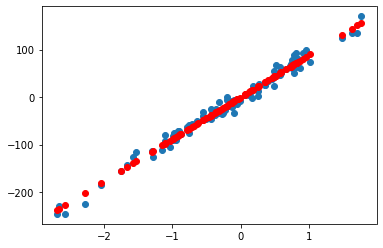

In [15]:
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

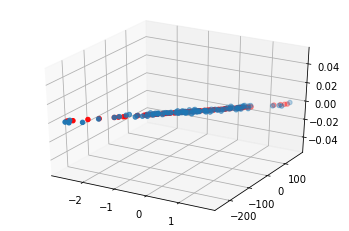

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
ax.scatter(x, y)
ax.scatter(x, predictions, c='r')

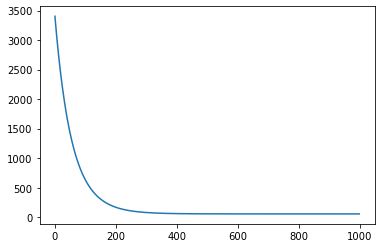

In [17]:
plt.plot(range(n_iterations), cost_history)

In [18]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [19]:
coef_determination(y, predictions)

0.983257516636661